## Jeu de dé


"On simule le lancement d'un dé. On gagne lorsque le numéro est 1, 2 ou 6. Sinon on a perdu. Exercice : écrire un programme simulant ce jeu d’abord sans utiliser de liste puis en utilisant une liste. Information : pour avoir un nombre entier aléatoire simulant le lancement du dé, il faut utiliser la fonction randint du module random."

In [1]:
from random import randint

#Une premiere fonction sans utiliser de liste... ce n'est pas optimal du tout mais ça fonctionne.
def test_de_gagnant(d):
    """ Fonction testant la valeur du nombre d. 
        Le joueur gagne si cette valeur est egale a 1, 2 ou 6.
    """
    if d == 1:
        return "Vous avez gagne !"
    elif d == 2:
        return "Vous avez gagne !"
    elif d == 6:
        return "Vous avez gagne !"
    else:
        return "Vous avez perdu :-("

n = randint(1, 6)
print(n)

print test_de_gagnant(n)

3
Vous avez perdu :-(


In [2]:
#Une proposition d'une autre fonction qui utilise une liste.
def test_de_gagnant_optimise(d):
    """ Fonction testant la valeur du nombre d. 
        Le joueur gagne si cette valeur est egale a 1, 2 ou 6.
    """
    if d in [1, 5, 6]:
        return "Vous avez gagne !"
    else:
        return "Vous avez perdu :-("

m = randint(1, 6)
print(m)

print test_de_gagnant_optimise(m)

1
Vous avez gagne !


On peut comparer le temps de calcul des 2 fonctions grâce au module `time`. Sur un petit code comme ça, la différence n'est pas énorme.

In [3]:
import time

start = time.time()
test_de_gagnant(m)
diff = (time.time() - start)
print "Temps de calcul, test_de_gagnant avec le chiffre", m,"          : ", diff

start = time.time()
test_de_gagnant_optimise(m)
diff = (time.time() - start)
print "Temps de calcul, test_de_gagnant_optimise avec le chiffre", m," : ", diff

Temps de calcul, test_de_gagnant avec le chiffre 1           :  0.000149965286255
Temps de calcul, test_de_gagnant_optimise avec le chiffre 1  :  0.000137090682983


## Comptage d'objets

Soit une liste d'éléments discrets pouvant apparaître plusieurs fois. Compter le nombre d'occurence de chaque éléments.

In [4]:
def comptage(elements):
    counter = {}
    for element in elements:
        counter[element] = counter[element]+1 if counter.has_key(element) else 1
    
    return counter

Vous pouvez également utiliser directement la méthode de `list` : `count`

In [3]:
def comptage(elements):
    counter = {}
    for element in elements:
        counter[element] = elements.count(element) if counter.has_key(element) else 1
    
    return counter

In [4]:
test_list = list('AAABBC')
result = comptage(test_list)

print result['A']
print result['B']
print result['C']

assert result['A'] == 3
assert result['B'] == 2
assert result['C'] == 1

3
2
1


Une autre manière de faire consiste à utiliser la classe `Counter` du module `collections`. A vous de comprendre le fonctionnement la classe `Counter` !

In [5]:
from collections import Counter

def comptage2(elements):
    counter = Counter()
    for element in elements:
        counter[element]+=1
    
    return counter

result2 = comptage2(test_list)

assert result2['A'] == 3
assert result2['B'] == 2
assert result2['C'] == 1

## Trouver la racine d'une fonction

Nous avons un problème avec la méthode du gradient pour trouver le minimum d'une fonction. Nous souhaitons maintenant chercher la racine $x_0$ d'une fonction $f$ telle que $f(x_0) = 0$.

Nous vous proposon de le faire par dichotomie

https://fr.wikipedia.org/wiki/M%C3%A9thode_de_dichotomie

La méthode repose sur le fait que si  $x_0 \in [a,b]$, alors $f(a)$ et $f(b)$ sont de signes opposés.

Partant d'un intervalle initial ayant cette propriété, il nous suffit ensuite de le partager en 2, et de garder le côté qui la respecte encore, et d'itérer dessus jusqu'à obtenir un encadrement suffisamment précis pour la valeur recherchée.


In [7]:
def zero(f, a, b, err=0.001):
    while abs(b-a) > err:
        c = (a+b)/2.0
        if f(a)*f(c) < 0:
            b = c
        else :
            a = c
        print a,b
    return c

In [8]:
def f(x):
    return x**3-8

err = 0.01

assert abs(zero(f,-10,10, err=err)-2) < err

0.0 10
0.0 5.0
0.0 2.5
1.25 2.5
1.875 2.5
1.875 2.1875
1.875 2.03125
1.953125 2.03125
1.9921875 2.03125
1.9921875 2.01171875
1.9921875 2.001953125


## Test statistique unilatéral

On fait un relevé par an de la moyenne de la température dans une région du globe sur les 40 dernières années. La moyenne globale vaut 26°.

On souhaite tester l'hypothèse que la variation de température obéit à une loi normale de moyenne 25° et d'écart-type 2°, avec un niveau de confiance de 95%. 


1. Calculer le score z : $z = \frac{\bar x - \mu}{\sigma / \sqrt N }$

1. Calculer la probabilité que l'hypothèse nulle donne un score **supérieur ou égal** à cette valeur.

1. Peut-on rejeter l'hypothèse avec un niveau de confiance de 95% ?


In [7]:
from scipy.stats import norm
from math import sqrt

Le score z est une transformation canonique qui permet de normaliser la position et l'étalement d'une variable. Le théorème central limite nous dit de plus que cette variable, pour N large, tend vers la distribution normale $N(0,1)$, avec laquelle nous sommes familiers.

Dans notre cas, nous calculons ici la position de la moyenne empirique $\bar x$ par rapport à l'hypothèse que nous faisons, et qui stipule que les valeurs mesurées sont issues d'une loi normale avec $\mu = 25°$ et $\sigma = 2°$.

In [21]:
z = (26-25)/(2./sqrt(40))
print z

3.16227766017


De par la définition de la cdf, nous avons directement :

In [22]:
norm.cdf(z)

0.99921729887099875

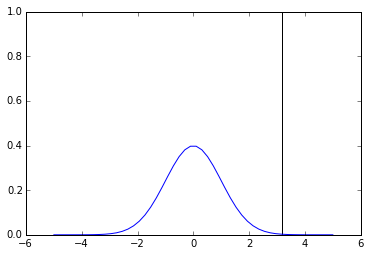

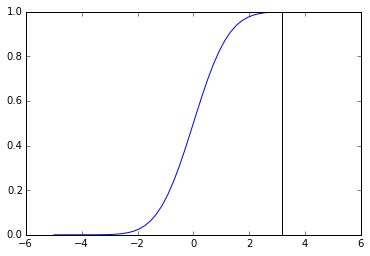

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5,5)
plt.plot(x, norm.pdf(x))
plt.vlines(z, 0,1)
plt.figure()
plt.plot(x, norm.cdf(x))
plt.vlines(z, 0,1)
plt.show()

Nous avons représenté la position de notre mesure par rapport à la distribution correspondant à notre hypothèse initiale. Nous voyons que cette valeur est assez extrême, et la cdf nous montre que les valeurs réalisées sont presque à 100% à gauche de z. **Vous pouvez refaire l'exercice en considérant qu'il n'y a que 10 échantillons au lieu de 40**. Où va être, selon vous, la nouvelle valeur de z ? pourquoi ?

Pour réaliser un test d'hypothèse à un niveau de confiance donné, il suffit de comparer la probabilité d'occurence de notre valeur par rapport à la valeur correspondant à notre niveau de confiance.

Ici nous avons choisi un niveau de confiance de 95%, et nous avons une p-value de 0.05 (1-0.95).

In [9]:
1-norm.cdf(3.16) < 0.05

3.16227766017


True

Nous pouvons rejeter l'hypothèse avec une niveau de confiance de 95%.

## Test statistique bilatéral

Une entreprise communique sur un nouveau procédé révolutionnaire qui est appliqué avec un taux de succès de 80%. Un enquêteur indépendant conduit un test aléatoire 100 fois, et trouve un taux de seulement 73%.

1. On considère qu'on peut utiliser le théorème central limite pour calculer l'écart-type avec la formule suivante :  $\sigma = \sqrt{\hat p (1 - \hat p)/n}$.
Ecrire la fonction `sigma_binom()` qui calcule cette quantité

2. Calculer la variable $z = \frac{p_0-\hat p}{\sigma}$

3. Calculer la probabilité que l'hypothèse nulle, correspondant au taux de succès de 80%, donne un score **différent de** 80% 

4. Peut-on rejeter l'hypothèse nulle avec un niveau de confiance de 95% ?

In [10]:
def sigma_binomial(p, n):
    return sqrt(p*(1-p)/n)

In [11]:
z = (0.8-0.73)/sigma_binomial(0.73,100)
print z

1.5767205496


Nous cherchons la probabilité d'un score différent de 80%, soit qu'il soit beaucoup plus petit ou beaucoup plus grand. C'est donc la somme des probabilités d'être trop à droite ou trop à gauche.